<a href="https://colab.research.google.com/github/honeybeat1/10minutes2pandas/blob/master/n134a_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


# 1. Dataset prepare

아래의 주소를 참조하여, 데이터를 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- "diagnosis"에 있는 label 데이터를 따로 변수로 생성하세요.


In [ ]:
from google.colab import files
files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

# read data as df
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df_diagnosis = df['diagnosis']
df_diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df.shape

(569, 33)

In [ ]:
df.isna().sum()

- 이후 해당 column을 제거한 나머지 데이터를 사용하여 k-means clustering을 하며 k = 2를 제외한 다른 parameter는 default option을 사용합니다.

In [6]:
df = df.drop(['diagnosis','Unnamed: 32'], axis=1)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
from sklearn.cluster import KMeans 
#k=2 그룹화
kmeans = KMeans(n_clusters = 2)
#kmeans 모델에 데이터 fit
kmeans.fit(df)
labels = kmeans.labels_

new_series = pd.Series(labels)
df['clusters'] = new_series.values
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df['clusters'].unique()

array([0, 1], dtype=int32)

In [10]:
df['clusters'].value_counts()

0    558
1     11
Name: clusters, dtype: int64

In [11]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

#랜덤하게 2개의 중심점에서 시작하기
centroids = get_centroids(df, 'clusters')
centroids


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.329564e+07,14.098323,19.246810,91.775627,650.778136,0.096399,0.104449,0.088350,0.048765,0.181284,0.062846,0.399922,1.215931,2.828849,39.262953,0.006990,0.025390,0.031633,0.011724,0.020543,0.003784,16.226733,25.642939,106.975161,873.434229,0.132369,0.254764,0.271883,0.114457,0.290582,0.084053
1,8.966003e+08,15.596818,21.462727,101.780000,863.427273,0.094388,0.098876,0.111601,0.056764,0.174973,0.060323,0.671518,1.263664,4.753636,94.824545,0.009623,0.029958,0.045094,0.015457,0.020531,0.004330,18.422909,27.416364,121.771818,1243.227273,0.132357,0.228943,0.287664,0.122173,0.264373,0.078486


2. 

- 원래 라벨과, clustering 이후의 라벨을 비교하여 accuracy를 측정하세요. 

- accuracy = 전체데이터중에 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = (2 + 2) / 6



In [109]:
acc_df = pd.DataFrame([df_diagnosis, df['clusters']]).T
acc_df['clusters'] = acc_df['clusters'].replace(0, 'M')
acc_df['clusters'] = acc_df['clusters'].replace(1, 'B')
acc_df

,diagnosis,clusters
0,M,M
1,M,M
2,M,M
3,M,M
4,M,M
...,...,...
564,M,M
565,M,M
566,M,M
567,M,M


In [13]:
#for문 돌려서 accuracy 직접 구하기
sum = 0
for i, j in acc_df.values:
  if (i==j):
    sum += 1
print(sum/len(acc_df))

0.37434094903339193


In [14]:
#sklearn 라이브러리로 accuracy 구하기
import sklearn
sklearn.metrics.accuracy_score(acc_df['diagnosis'], acc_df['clusters'])

0.37434094903339193

In [16]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 2. Data pre-process 후 clustering을 시행해보세요

- 각 Feature별로 Scale 조절을 위해 데이터 정규화를 하세요.
- 이후 PCA를 시행하세요.
- scree plot을 통해 90%의 variation을 설명하기 위해 사용되는 PC의 수를 확인해보세요.
- PC1과 PC2만 사용하여 clustering 후 scatter plot을 그려보세요.
- 앞의 결과와 달라지는지, 그리고 그 이유에 대해서 간략하게 설명하세요. 




In [ ]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#데이터 정규화
scaler = StandardScaler()

Z = scaler.fit_transform(df)
print("\n Standardized Data: \n", Z)
#PCA 10로
pca = PCA(10)
pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B)

In [65]:
pca.explained_variance_ratio_

array([0.41540546, 0.17822142, 0.09072214, 0.06206125, 0.0594726 ,
       0.05151318, 0.03717536, 0.02106469, 0.01450968, 0.01274732])

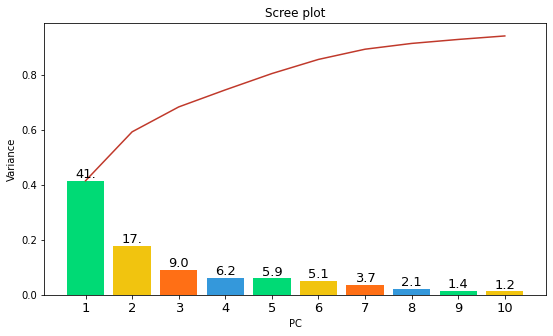

In [112]:
#scree plot 그리기
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(9,5))
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.xticks(np.arange(0,10),list(range(1,11)), fontsize=13)
    plt.title('Scree plot')
    
scree_plot(pca)

In [73]:
np.sum(pca.explained_variance_ratio_[:8]*100)

91.56361050892762

- 90%의 variation을 설명하기 위해서는 PC8까지 사용해야 한다. (주성분 8개)


In [92]:
#pca 반영된 df 생성 + label
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pc_df = pd.DataFrame(data = B, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pc_df['Cluster'] = df_diagnosis
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,9.176281,1.994417,-1.250350,3.576611,0.641776,-1.204637,1.370816,2.168185,-0.297736,-0.153239,M
1,2.380743,-3.737364,-0.695691,1.175340,-0.091725,0.610468,-0.027875,0.023805,0.374343,-0.671517,M
2,5.739059,-1.067103,-0.567370,0.861318,0.279682,-0.176369,0.549845,-0.672397,0.052061,0.002940,M
3,7.114744,10.286398,-2.935701,-0.162663,1.109964,-2.941389,3.178640,1.383918,1.234851,-1.227290,M
4,3.944187,-1.955890,1.311379,2.916216,0.509646,0.552014,-1.229725,-0.929202,0.673191,-0.141939,M


In [93]:
#PC1과 PC2만 사용하여 clustering 후 scatter plot을 그려보세요.
pc_df = pc_df[['PC1','PC2']]
pc_df

,PC1,PC2
0,9.176281,1.994417
1,2.380743,-3.737364
2,5.739059,-1.067103
3,7.114744,10.286398
4,3.944187,-1.955890
...,...,...
564,6.433521,-3.556262
565,3.787523,-3.563686
566,1.249566,-1.886128
567,10.357685,1.723274


In [94]:
from sklearn.cluster import KMeans 
#k=2 그룹화
kmeans = KMeans(n_clusters = 2)
#kmeans 모델에 데이터 fit
kmeans.fit(pc_df)
labels = kmeans.labels_

new_series = pd.Series(labels)
pc_df['clusters'] = new_series.values
pc_df.head()

,PC1,PC2,clusters
0,9.176281,1.994417,1
1,2.380743,-3.737364,1
2,5.739059,-1.067103,1
3,7.114744,10.286398,1
4,3.944187,-1.955890,1


In [106]:
pc_df['clusters'].value_counts()

0    378
1    191
Name: clusters, dtype: int64

In [96]:
centroids = get_centroids(pc_df, 'clusters')
centroids
#plot_clusters(df, 'clusters', centroids)

,PC1,PC2
clusters,,
0,-2.202688,-0.025461
1,4.359246,0.050389


In [99]:
centroids.iloc[0].PC1

-2.2026875640686323

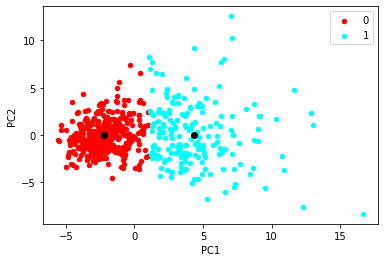

In [101]:
#scatter plot 그리기
def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].PC1, centroids.iloc[0].PC2, "ok") # 기존 중심점
  ax.plot(centroids.iloc[1].PC1, centroids.iloc[1].PC2, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'PC1', y = 'PC2', label = key, color = colors[key])
  plt.show()
  
plot_clusters(pc_df, 'clusters', centroids)

In [110]:
acc_df['diagnosis'] = acc_df['diagnosis'].replace('B', 0)
acc_df['diagnosis'] = acc_df['diagnosis'].replace('M', 1)

In [111]:
sklearn.metrics.accuracy_score(acc_df['diagnosis'], pc_df['clusters'])

0.9068541300527241

### 앞의 결과와 달라지는지, 그리고 그 이유에 대해서 간략하게 설명하세요.
- accuracy 37.4%를 보인 앞의 결과와 달리 PCA를 하고 clustering을 하면 정확도가 90%로 증가했다.
- 이는 차원을 축소하면 오버 피팅이 되지 않고, 분석에 의미있는 변수만 남아서 더 정확한 클러스터링을 할 수 있다는 뜻이다.  

# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>
